In [1]:
#importing python libraries for predicting house prices

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import os

# Input data files are available in the read-only "../input/" directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print("No of null values per column:")
print(data.isnull().sum()[data.isnull().sum() > 0])

No of null values per column:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [6]:
#Handling missing values
num_cols = data.select_dtypes(include=['float', 'int']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

#Categorical columns where NA/None is a valid missing value
#where NA/None is not a meaningful, expected value according to data_description contents
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
print(data.isnull().sum()[data.isnull().sum() > 0])

Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


All above columns were already expected to have NA/None as a valid value, based on data_description.txt, so these are not treated as missing values.

In [7]:
correlation_matrix = data.corr(numeric_only=True)
print(correlation_matrix)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.009601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.357056 -0.139781     0.032628   
LotFrontage   -0.009601   -0.357056     1.000000  0.306795     0.234196   
LotArea       -0.033226   -0.139781     0.306795  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.234196  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.052820 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.117598  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.082746  0.013788     0.550684   
MasVnrArea    -0.050199    0.022895     0.179283  0.103960     0.410238   
BsmtFinSF1    -0.005024   -0.069836     0.215828  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.043340  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.122156 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

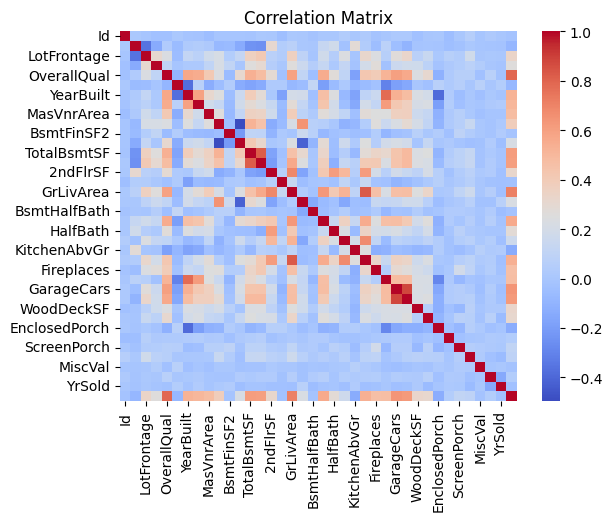

In [8]:
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
#One Hot Encoding by combining and then splitting train and test data

combined_data = pd.concat([data, test_data], axis=0, ignore_index=True)
combined_encoded = pd.get_dummies(combined_data, drop_first=False)

# Split back into train and test
data = combined_encoded[combined_encoded['Id'] <= 1460].reset_index()
test_data = combined_encoded[combined_encoded['Id'] >= 1461].reset_index()

data.head()

,index,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,False,False,False,True,False,False,False,False,True,False
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,False,False,False,True,False,False,False,False,True,False
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,False,False,False,True,False,False,False,False,True,False
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,False,False,False,True,True,False,False,False,False,False
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,False,False,False,True,False,False,False,False,True,False


In [10]:
corr_matrix = data.corr()
# Select upper triangle of correlation matrix (to avoid duplicate pairs)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > threshold (0.9)
high_corr_pairs = [(column, row) for column in upper.columns for row in upper.index if upper.loc[row, column] > 0.9]
to_drop=[]

# Check high-correlation pairs
for col1, col2 in high_corr_pairs:
    to_drop.append(col2)
    print(f"{col1} and {col2} have high correlation of {corr_matrix.loc[col1, col2]:.2f}")

Id and index have high correlation of 1.00
Exterior2nd_CBlock and Exterior1st_CBlock have high correlation of 1.00
Exterior2nd_CmentBd and Exterior1st_CemntBd have high correlation of 0.97
Exterior2nd_MetalSd and Exterior1st_MetalSd have high correlation of 0.97
Exterior2nd_VinylSd and Exterior1st_VinylSd have high correlation of 0.98
SaleCondition_Partial and SaleType_New have high correlation of 0.99


In [11]:
# Drop one of each highly correlated pair
data = data.drop(columns=to_drop)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,False,False,False,True,False,False,False,False,True,False


In [12]:
data = data.drop(['Id'], axis=1)

              Feature  Importance
3         OverallQual    0.545862
15          GrLivArea    0.115095
11        TotalBsmtSF    0.046124
25         GarageCars    0.041024
26         GarageArea    0.024130
12           1stFlrSF    0.022101
8          BsmtFinSF1    0.022074
5           YearBuilt    0.015836
4         OverallCond    0.012430
2             LotArea    0.011802
213      CentralAir_Y    0.010112
6        YearRemodAdd    0.008689
1         LotFrontage    0.006284
13           2ndFlrSF    0.005861
10          BsmtUnfSF    0.005156
23         Fireplaces    0.005088
40        MSZoning_RM    0.004434
212      CentralAir_N    0.004269
24        GarageYrBlt    0.003578
36   MSZoning_C (all)    0.003556


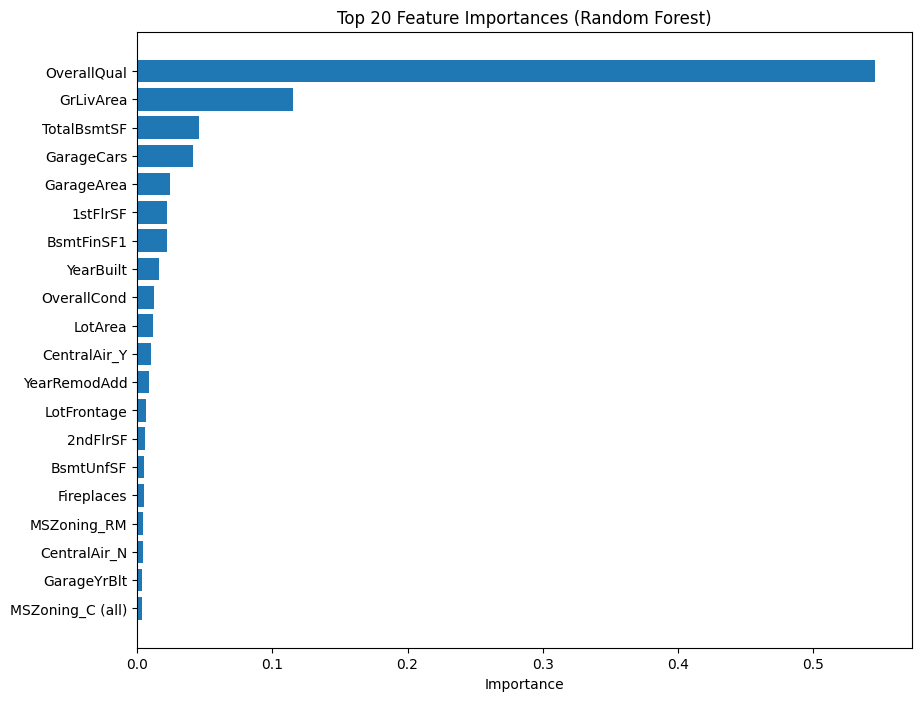

In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
y = np.log1p(data['SalePrice'])
X = data.drop('SalePrice', axis=1)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display top N important features
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df.head(20))

# Plot top 20 features
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'][:20][::-1], importance_df['Importance'][:20][::-1])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.show()

In [14]:
# Validating feature importance using Lasso

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Lasso with cross-validation
lasso = LassoCV(cv=5, random_state=42, max_iter=10000)
lasso.fit(X_scaled, y)

#Get coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

# Filter features with non-zero coefficients
important_features = coef_df[coef_df['Coefficient'] != 0]

# Sort by absolute coefficient value (importance)
important_features = important_features.reindex(
    important_features['Coefficient'].abs().sort_values(ascending=False).index
)

# Display the top N important features (optional)
print("Important Features Selected by Lasso:\n")
print(important_features.head(20))  # Change 20 to display more or all


# Reduce X to only important features
X_reduced = X[important_features['Feature']]

print(f"Original feature count: {X.shape[1]}")
print(f"Selected features after Lasso: {X_reduced.shape[1]}")

Important Features Selected by Lasso:

                   Feature  Coefficient
15               GrLivArea     0.127520
3              OverallQual     0.080527
124       RoofMatl_ClyTile    -0.063265
5                YearBuilt     0.043439
11             TotalBsmtSF     0.039432
4              OverallCond     0.035876
36        MSZoning_C (all)    -0.028242
101        Condition2_PosN    -0.026893
8               BsmtFinSF1     0.023951
25              GarageCars     0.023187
26              GarageArea     0.021738
40             MSZoning_RM    -0.020662
69    Neighborhood_Crawfor     0.018827
6             YearRemodAdd     0.018534
276  SaleCondition_Abnorml    -0.015281
23              Fireplaces     0.015098
2                  LotArea     0.013866
212           CentralAir_N    -0.012796
16            BsmtFullBath     0.012644
219         KitchenQual_Ex     0.012212
Original feature count: 282
Selected features after Lasso: 100


In [15]:
X_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GrLivArea              1460 non-null   int64  
 1   OverallQual            1460 non-null   int64  
 2   RoofMatl_ClyTile       1460 non-null   bool   
 3   YearBuilt              1460 non-null   int64  
 4   TotalBsmtSF            1460 non-null   float64
 5   OverallCond            1460 non-null   int64  
 6   MSZoning_C (all)       1460 non-null   bool   
 7   Condition2_PosN        1460 non-null   bool   
 8   BsmtFinSF1             1460 non-null   float64
 9   GarageCars             1460 non-null   float64
 10  GarageArea             1460 non-null   float64
 11  MSZoning_RM            1460 non-null   bool   
 12  Neighborhood_Crawfor   1460 non-null   bool   
 13  YearRemodAdd           1460 non-null   int64  
 14  SaleCondition_Abnorml  1460 non-null   bool   
 15  Fir

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# # Define parameter grid
# xgb_param_grid = {
#     'n_estimators': [100, 200, 250],
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [3,5,7,10],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # Initialize model
# xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

# # Grid search
# xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid,
#                         cv=3, n_jobs=-1, scoring='r2', verbose=1)
# xgb_grid.fit(X_train, y_train)

# # Best model and evaluation
# best_xgb = xgb_grid.best_estimator_
# print("Best XGBoost Parameters:", xgb_grid.best_params_)
# print("R² Score (XGBoost):", best_xgb.score(X_test, y_test))

In [18]:
xgb_model = xgb.XGBRegressor(
    n_estimators=250,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    enable_categorical=True
)
xgb_model.fit(X_train, y_train)
y_pred = np.expm1(xgb_model.predict(X_test))
print("Model Evaluation (XGBoost):")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

Model Evaluation (XGBoost):
R² Score: -221191203148.98755
MAE: 178017.39085052523
MSE: 37523747578.38773
RMSE: 193710.47358980807


In [19]:
Ids = test_data['Id']
test_data = test_data.drop(['Id'], axis=1)
test_data.head()

,index,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1460,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,True,False,False,False,False,True,False
1,1461,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,True,False,False,False,False,True,False
2,1462,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,True,False,False,False,False,True,False
3,1463,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,False,False,False,True,False,False,False,False,True,False
4,1464,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,False,False,False,True,False,False,False,False,True,False


In [20]:
test_data = test_data[important_features['Feature']]
ytest = np.expm1(xgb_model.predict(test_data))
submission = pd.DataFrame({'Id': Ids, 'SalePrice': ytest})
print(submission)

        Id     SalePrice
0     1461  295915.53125
1     1462  328375.37500
2     1463  341069.12500
3     1464  356275.53125
4     1465  375565.62500
...    ...           ...
1454  2915  281519.15625
1455  2916  307593.78125
1456  2917  363758.37500
1457  2918  324440.75000
1458  2919  356836.93750

[1459 rows x 2 columns]


In [21]:
submission.to_csv('submission.csv', index=False)
print("✅ Submission file saved as 'submission.csv'")

✅ Submission file saved as 'submission.csv'
